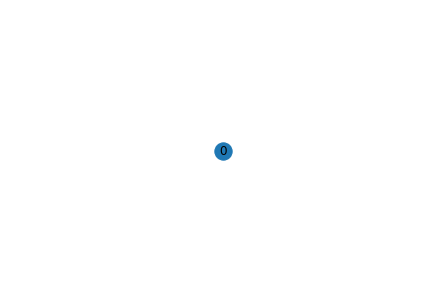

----------------------Aproxx Final Rank vector--------------------------

[1000]
[0.0]
[1]
[0]


In [ ]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt
import operator
import math
from decimal import Decimal

# graph 
g = nx.DiGraph()
nodes=[0]
g.add_nodes_from(nodes)



nx.draw(g,with_labels=True)
plt.draw()
plt.show()

matrix=nx.to_numpy_matrix(g)
matrix=matrix.tolist()

#number_of_simulations = int(input("enter number of simulations to be carried out:"))
number_of_simulations=1000
number_of_vertices = len(matrix)
Final_Rank_Vector = [0]*number_of_vertices
linkIDS = [i for i in range(number_of_vertices)]
linkIDS_len=[0] * number_of_vertices
outdegree_vec = [0]*number_of_vertices
for i in range(number_of_vertices):
  outdegree_vec[i]=sum(matrix[i])

total_number_of_visits=0

def outlinks(lst):
  c=0
  lst1=[]
  for i in range(number_of_vertices):
    if lst[i]>0:
      c=c+1
      lst1.append(i)
  return c,lst1

for n in range(number_of_vertices):
  #linkIDS[n]=n                                                                                  
  for i in range(number_of_simulations):
      node_random=n                                                                         
      while(1):
        Final_Rank_Vector[node_random]=Final_Rank_Vector[node_random]+1
        linkIDS[node_random]=linkIDS[n]
        linkIDS_len[linkIDS[n]] +=1
                                                                                  
        total_number_of_visits=total_number_of_visits+1

        if random.random() <= 0.20:
          break
        else:
          number_of_outlinks,lst = outlinks(matrix[node_random])
        
          if number_of_outlinks > 0:
            node_random=random.choice([l for l in lst])
          else:
            break;
    
                                                                 

print("----------------------Aproxx Final Rank vector--------------------------\n")
print(Final_Rank_Vector)


for i in range(len(linkIDS_len)):
  linkIDS_len[i]=math.ceil((linkIDS_len[i])/number_of_simulations)
                                                                                  

print(outdegree_vec)
print(linkIDS_len)
print(linkIDS)

In [ ]:
print("Enter the # nodes you need to add")
choice=int(input())
curr=0
for i in range(choice):
  curr =curr + 1
  node=curr
  nodes.append(node)
  g.add_nodes_from(nodes)
  linkIDS_len.append(1)
  linkIDS.append(node)
  outdegree_vec.append(0)

  indegree=random.randint(0,curr-1)
  aprox_visits=0
  dict_in = {}
# ------------------------------------------------------------------------------
  m=0;
  for i in range(indegree):
    previous_source = -1;
    source = int(random.uniform(0,curr-1))
    while previous_source==source:
      source = int(random.uniform(0,curr-1))
    previous_source = source

    outdegree_vec[source] = outdegree_vec[source] +1
    dict_in.update({source:1})
    g.add_edge(source,node)
    # if node link id is less than source we follow convention

    if linkIDS[node]<=linkIDS[source]:
      linkIDS_len[linkIDS[source]] += 1
    else:
      linkIDS_len[linkIDS[source]] +=1
      linkIDS[node]= linkIDS[source]
    
    length__1 = linkIDS_len[linkIDS[source]]
    temp = 100 * (0.80 * ((1 - math.pow(0.80,length__1))/0.20))
    m= max(m,temp)
    aprox_visits = aprox_visits + ( math.ceil((1/outdegree_vec[source])*( 0.80 * Final_Rank_Vector[source] )))
   

  aprox_visits = aprox_visits + number_of_simulations + m

  total_number_of_visits = total_number_of_visits + aprox_visits
  Final_Rank_Vector.append(aprox_visits)
# ------------------------------------------------------------------------------
  



# ------------------------------------------------------------------------------
  outdegree = int(random.randint(0,1))
  outdegree_vec[node]=outdegree

  for i in range(outdegree):
    previous_target = -1;
    target = int(random.uniform(0,curr-1))
    while previous_target==target:
      target = int(random.uniform(0,curr-1))
    previous_target=target
    g.add_edge(node,target)
    # --------------------------------------------------------------------------

    if target in dict_in.keys():
      # print("hello")
      jst_a_temporary1 = Final_Rank_Vector[node]
      jst_a_temporary2 = Final_Rank_Vector[target]
      Final_Rank_Vector[node] = max(Final_Rank_Vector[node],Final_Rank_Vector[target])
      Final_Rank_Vector[target] = max(Final_Rank_Vector[node],Final_Rank_Vector[target])
      total_number_of_visits = total_number_of_visits + ( Final_Rank_Vector[node] - jst_a_temporary1 ) + ( Final_Rank_Vector[target] - jst_a_temporary2 ) 

    # --------------------------------------------------------------------------

    else:
      length__1 = linkIDS_len[linkIDS[target]]
      linkIDS_len[linkIDS[node]] += length__1

      if linkIDS[target]>linkIDS[node]:
        linkIDS[target] = linkIDS[node]

      
      temp = 100* (0.80 * ((1 - math.pow(0.80,length__1))/0.20))
      
      val= math.ceil((1/outdegree_vec[node])*(0.80 * Final_Rank_Vector[node] ))
      Final_Rank_Vector[target] = Final_Rank_Vector[target] + val +temp
      total_number_of_visits = total_number_of_visits + val+ temp


  # ----------------------------------------------------------------------------
  # nx.draw(g,with_labels=True)
  # plt.draw()
  # plt.show()

  # print("number of visits to each node::",Final_Rank_Vector)
  # print("linkIDS ::",linkIDS)
  # print("linkIDS_lenght",linkIDS_len)
  # print("outdegree::" ,outdegree_vec)
  # print("total visits::::::::::",sum(Final_Rank_Vector))
  # print("total visits",total_number_of_visits)
  # x=[]
  # x=[(((i/(total_number_of_visits)))) for i in Final_Rank_Vector]
  # print("new proposed page rank->",x)
  # print(sum(x))

  # matrix=nx.to_numpy_matrix(g)
  # matrix=matrix.tolist()
  # # print(matrix)


  # number_of_simulations=1000
  # number_of_vertices=len(matrix)
  # Approx_Rank_Vector=[0]*number_of_vertices
  # length_vec=[0]*number_of_vertices
  # total_number_of_visits1=0
  # def outlinks(lst):
  #   c=0
  #   lst1=[]
  #   for i in range(number_of_vertices):
  #     if lst[i]!=0:
  #       c=c+1
  #       lst1.append(i)
  #   return c,lst1
  
  
  # for n in range(number_of_vertices):
  #   for i in range(number_of_simulations):
  #     node_random=n
  #     while(1):
  #       Approx_Rank_Vector[node_random]=Approx_Rank_Vector[node_random]+1
  #       length_vec[n]=length_vec[n]+1
  #       total_number_of_visits1=total_number_of_visits1+1
  #       termination_prob = random.uniform(0,1)
  #       if termination_prob <= 0.20:
  #         break
  #       else:
  #         number_of_outlinks,lst = outlinks(matrix[node_random])
        
  #         if number_of_outlinks > 0:
  #           for l in lst:
  #             if l==n:
  #               lst.remove(l)
  #           if len(lst) > 0:
  #             node_random=random.choice([l for l in lst])

  #         else:
  #           break;
      
        
  # final_Rank_Vector=[i for i in Approx_Rank_Vector]
  # print(final_Rank_Vector)
  # final_Rank_Vector=[(i/(total_number_of_visits1)) for i in final_Rank_Vector]
  # print("old proposed page rank->",final_Rank_Vector)
  # z=[int(i) for i in range(len(nodes))]
  # y1=final_Rank_Vector
  # y2=x
  # res=[]
  # for i in range(len(nodes)):
  #   res.append(y2[i]-y1[i])
  # fig = plt.figure(figsize=(10,2))
  # ax1 = fig.add_subplot(111)

  # ax1.scatter(z, y1, s=10, c='b',label="old")
  # #ax1.plot(x,y1)
  # ax1.scatter(z,y2, s=10, c='r', label="new-proposal")
  # #ax1.plot(y1,y2)
  # plt.legend(loc='best');
  # plt.vlines( z , y1, y2, colors = 'yellow',label = 'ERROR')
  # plt.show()
  
  # print("MAX::",max(res))
  # print("MIN::",min(res))
    



Enter the # nodes you need to add
1000


In [ ]:
matrix=nx.to_numpy_matrix(g)
matrix=matrix.tolist()
# print(matrix)


number_of_simulations=1000
number_of_vertices=len(matrix)
Approx_Rank_Vector=[0]*number_of_vertices
length_vec=[0]*number_of_vertices
total_number_of_visits1=0
def outlinks(lst):
  c=0
  lst1=[]
  for i in range(number_of_vertices):
    if lst[i]!=0:
      c=c+1
      lst1.append(i)
  return c,lst1


for n in range(number_of_vertices):
  for i in range(number_of_simulations):
    node_random=n
    while(1):
      Approx_Rank_Vector[node_random]=Approx_Rank_Vector[node_random]+1
      length_vec[n]=length_vec[n]+1
      total_number_of_visits1=total_number_of_visits1+1
      termination_prob = random.uniform(0,1)
      if termination_prob <= 0.20:
        break
      else:
        number_of_outlinks,lst = outlinks(matrix[node_random])
      
        if number_of_outlinks > 0:
          for l in lst:
            if l==n:
              lst.remove(l)
          if len(lst) > 0:
            node_random=random.choice([l for l in lst])

        else:
          break;

In [ ]:
# nx.draw(g,with_labels=True)
# plt.draw()
# plt.show()

print("number of visits to each node::",Final_Rank_Vector)
print("linkIDS ::",linkIDS)
print("linkIDS_lenght",linkIDS_len)
print("outdegree::" ,outdegree_vec)
print("total visits::::::::::",sum(Final_Rank_Vector))
print("total visits",total_number_of_visits)
x=[]
x=[(((i/(total_number_of_visits)))) for i in Final_Rank_Vector]
print("new proposed page rank->",x)
print(sum(x))

number of visits to each node:: [2.397737069786579e+32, 20704.031901534596, 2648.0, 78984.2, 29130942300401.113, 1.2555838466847057e+44, 1.0171819309945387e+38, 4531.992800745259, 205115985522.04852, 21118.03285934431, 2338614570635056.0, 6325170.0, 2897011559.0, 5.1780570849991256e+42, 3980550883.0, 9.146205867634052e+19, 38353.0, 54900.0, 62750.0, 1.3574781737840291e+42, 2.4530413255354732e+35, 4.164865236828313e+34, 3.808765260074429e+23, 9.44853413775406e+34, 18677391043.0, 142775.0, 243030.0, 7.535283404843656e+25, 37964639.0, 2.7856529999090133e+20, 53798.0, 13793646094.0, 3.938922810752242e+42, 5.220107754905e+38, 5.3046911971907064e+32, 1.1696446501053555e+46, 1390812142268.0, 1.4225112901712658e+18, 6.902738180834553e+27, 136790.0, 4.5377886392355016e+16, 34769.0, 1.6874841834397533e+44, 14796947.0, 2.9625197405142166e+31, 169528.0, 6862854001.0, 162232.0, 5.22407235382586e+22, 1.2105629614864926e+36, 1.028506970688064e+28, 1.0646297732777768e+33, 30265003382.0, 220053159063.0

[1032, 1009, 1001, 1004, 1013, 1168, 1067, 1009, 1011, 1010, 1010, 1020, 1007, 1137, 1016, 1023, 1020, 1005, 1015, 1128, 1038, 1042, 1052, 1037, 1017, 1010, 1003, 1006, 1039, 1044, 1014, 1042, 1172, 1070, 1023, 1339, 1016, 1034, 1013, 1042, 1047, 1024, 1359, 1019, 1045, 1022, 1038, 1025, 1033, 1082, 1065, 1012, 1099, 1063, 1023, 1073, 1007, 1044, 1010, 1031, 1090, 1065, 1082, 1049, 1081, 1060, 1091, 1011, 1112, 1094, 1038, 1175, 1111, 1104, 1099, 1009, 3478, 1104, 1129, 1132, 1006, 1088, 1070, 1100, 1054, 1110, 1013, 1129, 1151, 2107, 1116, 1044, 1137, 1088, 1049, 1144, 1112, 1048, 1051, 1225, 1117, 1115, 1077, 1056, 1104, 1153, 1020, 1023, 1036, 1114, 1163, 1162, 1208, 1013, 1036, 1119, 1158, 1405, 1170, 1080, 1065, 1095, 1039, 1023, 1220, 1087, 1161, 1102, 1159, 1192, 1043, 1234, 1047, 2326, 1043, 1146, 1197, 1176, 1214, 1103, 1259, 1168, 9256, 1032, 1197, 1222, 1156, 1241, 1315, 1372, 1072, 1048, 1142, 1228, 1287, 1234, 1209, 1261, 1133, 1376, 1242, 1290, 1288, 1202, 1326, 1190, 125

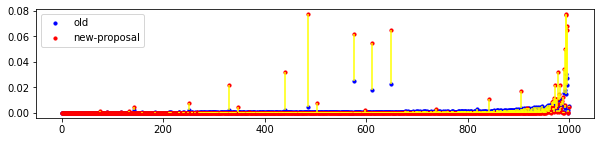

In [ ]:
final_Rank_Vector=[i for i in Approx_Rank_Vector]
print(final_Rank_Vector)
final_Rank_Vector=[(i/(total_number_of_visits1)) for i in final_Rank_Vector]
print("old proposed page rank->",final_Rank_Vector)
z=[int(i) for i in range(len(nodes))]
y1=final_Rank_Vector
y2=x
# res=[]
# for i in range(len(nodes)):
#   res.append(y2[i]-y1[i])
fig = plt.figure(figsize=(10,2))
ax1 = fig.add_subplot(111)

ax1.scatter(z, y1, s=10, c='b',label="old")
#ax1.plot(x,y1)
ax1.scatter(z,y2, s=10, c='r', label="new-proposal")
#ax1.plot(y1,y2)
plt.legend(loc='best');
plt.vlines( z , y1, y2, colors = 'yellow',label = 'ERROR')
plt.show()

# print("MAX::",max(res))
# print("MIN::",min(res))

In [ ]:
nx.write_edgelist(g, "weighted_test_edgelist500.txt", delimiter=' ', data=['weight'])